# Финальный проект "Телеком" прогнозирование оттока клиентов.

**Описание проекта:**

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг:**

Оператор предоставляет два основных типа услуг: 

	1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
	2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

	- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
	- Выделенная линия технической поддержки (TechSupport);
	- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
	- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
    
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.


**Описание данных:**

Данные состоят из файлов, полученных из разных источников:

	- contract_new.csv — информация о договоре;
	- personal_new.csv — персональные данные клиента;
	- internet_new.csv — информация об интернет-услугах;
	- phone_new.csv — информация об услугах телефонии.
		
Информация о договорах актуальна на 1 февраля 2020.

**Цель проекта:**

Построение модели машинного обучения для прогнозирования оттока клиентов с целью предложения таким клиентам специальных условий и промокодов. Ведь как известно, сохранить клиента легче, чем найти нового.

**План работы:**

1. Загрузка необходимых библиотек, загрузка данных.

2. Знакомство с данными.

3. Объединение таблиц и предобработка данных.\
   3.1. Объединение таблиц.\
   3.2. Предобработка данных.\
   3.3. Добавление столбцов и формирование целевого признака.
   
4. Исследовательский анализ данных.\
   4.1  Анализ целевого признака.\
   4.2  Корреляция признаков.\
   4.3  Исследование числовых признаков.\
   4.4  Исследование категориальных признаков.

5. Подготовка данных для машинного обучения.\
   5.1. Удаление не информативных признаков.\
   5.2  Разделение на выборки, кодирование и масштабирование признаков.\
     
6. Обучение моделей, выбор лучшей модели.\
   6.1  Случайный лес (RandomForest).\
   6.2  LightGBM.\
   6.3  CatBoost.
  
7. Тестирование модели на тестовых данных.

8. Анализ модели.\
  8.1. Построение матрицы ошибок.\
  8.2. Построение ROC -кривой.\
  8.3. Исследование важности признаков лучшей модели.

9. Отчет по проекту.


## Загрузка необходимых библиотек, загрузка данных.

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from datetime import timedelta
from datetime import datetime

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    GridSearchCV,
    cross_val_score
)

from sklearn.preprocessing import (
    OrdinalEncoder,
    StandardScaler
)

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
!pip install lightgbm
import lightgbm
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline


from sklearn.metrics import (
    accuracy_score,
    roc_auc_score, 
    roc_curve,
    make_scorer,
    ConfusionMatrixDisplay,
    confusion_matrix,
    RocCurveDisplay,
    classification_report
)

import os
import warnings
warnings.filterwarnings('ignore')

# зададим формат отображения вещественных чисел в Pandas, два знака после запятой
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
!pip install phik
import phik

from phik.report import plot_correlation_matrix
from phik import resources, report


In [3]:
RANDOM_STATE = 140823

In [4]:
# загрузим данные
df_1 = 'contract_new.csv'
df_11 = '/datasets/contract_new.csv'

df_2 = 'personal_new.csv'
df_22 = '/datasets/personal_new.csv'

df_3 = 'internet_new.csv'
df_33 = '/datasets/internet_new.csv'

df_4 = 'phone_new.csv'
df_44 = '/datasets/phone_new.csv'

# информация о договоре
if os.path.exists(df_1):
    contract = pd.read_csv(df_1)
elif os.path.exists(df_11):
    contract = pd.read_csv(df_11)
else:
    print('Something is wrong')    

# персональные данные клиента
if os.path.exists(df_2):
    personal = pd.read_csv(df_2)
elif os.path.exists(df_22):
    personal = pd.read_csv(df_22)
else:
    print('Something is wrong')
    
# информация об интернет-услугах
if os.path.exists(df_3):
    internet = pd.read_csv(df_3)
elif os.path.exists(df_33):
    internet = pd.read_csv(df_33)
else:
    print('Something is wrong')    
    
# информация об услугах телефонии
if os.path.exists(df_4):
    phone = pd.read_csv(df_4)
elif os.path.exists(df_44):
    phone = pd.read_csv(df_44)
else:
    print('Something is wrong')        

## Знакомство с данными.

In [5]:
# посмотрим на размер датафреймов
contract.shape, personal.shape, internet.shape, phone.shape

((7043, 8), (7043, 5), (5517, 8), (6361, 2))

Основная таблица - contract и таблица personal содержат 7043 строки.

Видим, что в таблицах internet и phone строк меньше, чем в двух других таблицах. Скорее всего это связано с тем, что пользователям оказываются какие-то конкретные услуги телефонии или интернет-услуги.

In [6]:
# выведем первые 5 строк таблиц
for i, g in zip((contract, personal, internet, phone),
            ('CONTRACT', 'PERSONAL', 'INTERNET', 'PHONE')):
    print()
    print('-'*20, g, '-'*20)
    display(i.head())


-------------------- CONTRACT --------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



-------------------- PERSONAL --------------------


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



-------------------- INTERNET --------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



-------------------- PHONE --------------------


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [7]:
# посмотрим общую информацию о датафреймах
for i, g in zip((contract, personal, internet, phone),
            ('CONTRACT', 'PERSONAL', 'INTERNET', 'PHONE')):
    print()
    print('-'*20, g, '-'*20)
    print(i.info())


-------------------- CONTRACT --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

-------------------- PERSONAL --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 n

In [8]:
# посмотрим описание данных
for i, g in zip((contract, personal, internet, phone),
            ('CONTRACT', 'PERSONAL', 'INTERNET', 'PHONE')):
    print()
    print('-'*20, g, '-'*20)
    display(i.describe(include='all').T)


-------------------- CONTRACT --------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeginDate,7043,77,2014-02-01,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,67,No,5942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,"7,043.00",NaN,NaN,NaN,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043,6658,,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN



-------------------- PERSONAL --------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,"7,043.00",NaN,NaN,NaN,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN



-------------------- INTERNET --------------------


,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785



-------------------- PHONE --------------------


,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390


In [9]:
# проверим наличие всех customerID в таблицах contract и personal
personal['customerID'].isin(contract['customerID']).unique()

array([ True])

Так как количество строк в таблицах contract и personal одинаковое, мы убедились, что все пользователи в таблице contract есть в таблице personal.

In [10]:
# подсчитаем количество явных дубликатов
contract.duplicated().sum(), personal.duplicated().sum(),\
internet.duplicated().sum(), phone.duplicated().sum()

(0, 0, 0, 0)

In [11]:
# проверим уникальные значения в столбце customerID
len(contract['customerID'].unique()), len(personal['customerID'].unique()), \
len(internet['customerID'].unique()), len(phone['customerID'].unique())

(7043, 7043, 5517, 6361)

**ВЫВОДЫ:**

В имеющихся данных 4 таблицы с размерами:
- таблица contract содержит 7043 строк и 8 столбцов,
- таблица personal содержит 7043 строк и 5 столбцов,
- таблица internet содержит 5517 строк и 8 столбцов,
- таблица phone содержит 6361 строк и 2 столбца.

Пропущенные значения в строках таблиц отсутствуют.

Столбец customerID присутствует в каждой таблице. По нему можно объединить таблицы в одну.

Некоторые признаки необходимо привести к другому типу данных. Так, столбцы с датами необходимо будет перевести в формат даты. Формат данных столбца TotalCharges таблицы contract необходимо перевести в числовой формат float64.

Явные дубликаты в таблицах отсутствуют. Количество уникальных значений в столбце customerID соответствует количеству строк в таблицах.

Целевой признак сформируем самостоятельно с помощью столбца EndDate в таблице contract. 

Интернетом и телефоном пользуются не все клиенты, оформившие контракт. Этим обусловлена разница в количестве строк таблиц.

В основном признаки в таблицах категориальные, поэтому для обучеиня модели необходимо будет перевести их в числовой формат.

## Объединение таблиц и предобработка данных.

### Объединение таблиц.

Объединим таблицы в одну методом merge.

In [12]:
data = contract.merge(personal, on='customerID', how='left')\
               .merge(internet, on='customerID', how='left')\
               .merge(phone, on='customerID', how='left')
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [13]:
# посмотрим общую информацию полученного датафреймах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Пропуски наблюдаются только в столбцах и услугами, и это естественно. Интернетом и телефоном пользуются не все клиенты, оформившие контракт. Заменим пропуски на 'No'.

### Предобработка данных.

In [14]:
# приведем данные в некоторых столбцах к нижнему регистру
data['Type'] = data['Type'].str.lower()
data['PaymentMethod'] = data['PaymentMethod'].str.lower()
data['gender'] = data['gender'].str.lower()
data['Type'] = data['Type'].replace('month-to-month','month')

data.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,month,Yes,electronic check,29.85,31.04,female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,one year,No,mailed check,56.95,2071.84,male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,month,Yes,mailed check,53.85,226.17,male,0,No,No,DSL,Yes,Yes,No,No,No,No,No


In [15]:
# заполним пропуски в столбцах с услугами на 'NotUsed'
data = data.fillna('NotUsed')

In [16]:
# посмотрим общую информацию полученного датафреймах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [17]:
# посмотрим уникальные значения в столбце 'EndDate'
data['EndDate'].unique()

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [18]:
data.loc[data['EndDate'] == 'No']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,month,Yes,electronic check,29.85,31.04,female,0,Yes,No,DSL,No,Yes,No,No,No,No,NotUsed
1,5575-GNVDE,2017-04-01,No,one year,No,mailed check,56.95,2071.84,male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,month,Yes,mailed check,53.85,226.17,male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,one year,No,bank transfer (automatic),42.30,1960.6,male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NotUsed
4,9237-HQITU,2019-09-01,No,month,Yes,electronic check,70.70,353.5,female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,one year,Yes,mailed check,84.80,2035.2,male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,one year,Yes,credit card (automatic),103.20,7430.4,female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,month,Yes,electronic check,29.60,325.6,female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NotUsed
7041,8361-LTMKD,2019-07-01,No,month,Yes,mailed check,74.40,520.8,male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


На дату выгрузки данных - на '2020-02-01' имеются действующие пользователи в количестве 5942 человека.

Удостоверимся что нет клиентов, ушедших в день выгрузки базы. 

In [19]:
data.loc[data['EndDate'] == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines


In [20]:
# замена типа данных
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format="%Y/%m/%d")
data['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [21]:
# посмотрим общую информацию датафреймах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

### Добавление столбцов и формирование целевого признака.

Добавим целевой признак 'Left' на основе признака EndDate: 1- клиент ушел, 0 - клиент остался.

In [22]:
def target(x):
    if x == 'No':
        return 0
    else:
        return 1
    
data['Left'] = data['EndDate'].apply(target)

In [23]:
# проверяем корректность заполнениия столбца Left
data.loc[data['Left'] == 0]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Left
0,7590-VHVEG,2020-01-01,No,month,Yes,electronic check,29.85,31.04,female,0,...,No,DSL,No,Yes,No,No,No,No,NotUsed,0
1,5575-GNVDE,2017-04-01,No,one year,No,mailed check,56.95,"2,071.84",male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,No,month,Yes,mailed check,53.85,226.17,male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,No,one year,No,bank transfer (automatic),42.30,"1,960.60",male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NotUsed,0
4,9237-HQITU,2019-09-01,No,month,Yes,electronic check,70.70,353.50,female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,one year,Yes,mailed check,84.80,"2,035.20",male,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,0
7039,2234-XADUH,2014-02-01,No,one year,Yes,credit card (automatic),103.20,"7,430.40",female,0,...,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,0
7040,4801-JZAZL,2019-03-01,No,month,Yes,electronic check,29.60,325.60,female,0,...,Yes,DSL,Yes,No,No,No,No,No,NotUsed,0
7041,8361-LTMKD,2019-07-01,No,month,Yes,mailed check,74.40,520.80,male,1,...,No,Fiber optic,No,No,No,No,No,No,Yes,0


Для приведения к типу данных datetime столбца 'EndDate' заменим 'No' на дату выгрузки '2020-02-01'.

In [24]:
# заменим 'No' на дату выгрузки данных '2020-02-01'
data['EndDate'] = data['EndDate'].replace('No','2020-02-01')

In [25]:
# замена типа данных
data['EndDate'] = pd.to_datetime(data['EndDate'])

In [26]:
# изменим тип данных object на category для бустингов
for i in data.select_dtypes('object').columns.to_list():
    data[i] = data[i].astype('category')


Для анализа продолжительности сотрудничества с клиентами добавим столбец 'TotalMonths' - количество месяцев, через которое клиент ушел. Для оставшихся клиентов - это разница между сбором датасета и датой регистрации договора.

In [27]:
data['TotalMonths'] = (data['EndDate'] - data['BeginDate']) / np.timedelta64(1, 'M') 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   category      
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   category      
 9   SeniorCitizen     7043 non-null   category      
 10  Partner           7043 non-null   category      
 11  Dependents        7043 non-null   category      
 12  InternetService   7043 non-null   category      
 13  OnlineSecurity    7043 non-null   category      
 14  OnlineBackup      7043 n

In [29]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Left,TotalMonths
0,7590-VHVEG,2020-01-01,2020-02-01,month,Yes,electronic check,29.85,31.04,female,0,...,DSL,No,Yes,No,No,No,No,NotUsed,0,1.02
1,5575-GNVDE,2017-04-01,2020-02-01,one year,No,mailed check,56.95,"2,071.84",male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,34.04
2,3668-QPYBK,2019-10-01,2020-02-01,month,Yes,mailed check,53.85,226.17,male,0,...,DSL,Yes,Yes,No,No,No,No,No,0,4.04
3,7795-CFOCW,2016-05-01,2020-02-01,one year,No,bank transfer (automatic),42.30,"1,960.60",male,0,...,DSL,Yes,No,Yes,Yes,No,No,NotUsed,0,45.04
4,9237-HQITU,2019-09-01,2020-02-01,month,Yes,electronic check,70.70,353.50,female,0,...,Fiber optic,No,No,No,No,No,No,No,0,5.03


In [30]:
data['Type'].unique()

['month', 'one year', 'two year']
Categories (3, object): ['month', 'one year', 'two year']

In [31]:
# посмотрим количество уникальных значений в каждом столбце
for column in data.columns:
    print('Количество уникальных значений столбца', column, '', data[column].nunique())

Количество уникальных значений столбца customerID  7043
Количество уникальных значений столбца BeginDate  77
Количество уникальных значений столбца EndDate  67
Количество уникальных значений столбца Type  3
Количество уникальных значений столбца PaperlessBilling  2
Количество уникальных значений столбца PaymentMethod  4
Количество уникальных значений столбца MonthlyCharges  1585
Количество уникальных значений столбца TotalCharges  6657
Количество уникальных значений столбца gender  2
Количество уникальных значений столбца SeniorCitizen  2
Количество уникальных значений столбца Partner  2
Количество уникальных значений столбца Dependents  2
Количество уникальных значений столбца InternetService  3
Количество уникальных значений столбца OnlineSecurity  3
Количество уникальных значений столбца OnlineBackup  3
Количество уникальных значений столбца DeviceProtection  3
Количество уникальных значений столбца TechSupport  3
Количество уникальных значений столбца StreamingTV  3
Количество уник

Анализ количества уникальных значений в столбцах соответствует действительности.

**ВЫВОДЫ:**

В данном разделе мы объединили 4 таблицы в одну методом merge. После объединения в итоговой таблице получилось 20 столбцов.

Дополнительно мы создали еще 2 столбца:

	- для анализа продолжительности сотрудничества с клиентами добавили столбец 'TotalMonths' - количество месяцев, через которое клиент ушел. Для оставшихся клиентов - это разница между сбором датасета и датой регистрации договора. 
	 - добавили целевой признак 'Left' на основе признака 'EndDate': 1- клиент ушел, 0 - клиент остался. 

Итого в нашем рабочем датасете 22 столбца.

Так же мы заменили пропуски в столбцах с услугами, которые возникли после объединения таблиц, на 'No'. 

Для лучшего восприятия информации привели данные в некоторых столбцах к нижнему регистру.

Изменили типы данных:

	-	тип данных в столбцах  'BeginDate' и 'EndDate' заменили на datetime64,
	-	в столбце 'TotalCharges' тип данных заменили на float64,
	-	тип данных столбца 'SeniorCitizen' заменили на object.

Анализ количества уникальных значений в столбцах показал соответствие действительности. 


## Исследовательский анализ данных.

### Анализ целевого признака.

In [32]:
# посмотрим баланс классов
data['Left'].value_counts()

0    5942
1    1101
Name: Left, dtype: int64

В целевом признаке наблюдается значительный дисбаланс классов.

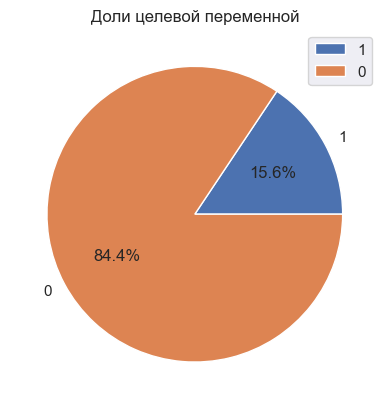

In [33]:
fig, ax = plt.subplots()

ax.pie([data['Left'].mean(), 1 - data['Left'].mean()], labels=['1', '0'], autopct='%1.1f%%')
ax.legend()
ax.set_title('Доли целевой переменной')

plt.show()

Как видим из графика 15.6% из всех пользователей расторгли договора оказания услуг. 

Так как целевая метрика проекта - AUC-ROC не чувствительна к дисбалансу, в данном проекте балансировать классы и учитывать дисбаланс при работе с моделями не будем.

### Корреляция признаков.

**Посмотрим корреляции признаков.**

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   category      
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   category      
 9   SeniorCitizen     7043 non-null   category      
 10  Partner           7043 non-null   category      
 11  Dependents        7043 non-null   category      
 12  InternetService   7043 non-null   category      
 13  OnlineSecurity    7043 non-null   category      
 14  OnlineBackup      7043 n

In [35]:
phik_overview = data.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Left', 'TotalMonths']


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Left,TotalMonths
customerID,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
BeginDate,1.00,1.00,0.55,0.77,0.08,0.46,0.42,0.77,0.01,0.05,...,0.19,0.46,0.50,0.50,0.46,0.42,0.43,0.47,0.45,0.98
EndDate,1.00,0.55,1.00,0.29,0.06,0.17,0.17,0.22,0.02,0.09,...,0.12,0.17,0.24,0.23,0.15,0.19,0.20,0.25,1.00,0.40
Type,1.00,0.77,0.29,1.00,0.11,0.28,0.39,0.47,0.00,0.09,...,0.51,0.64,0.58,0.63,0.67,0.55,0.55,0.24,0.09,0.63
PaperlessBilling,1.00,0.08,0.06,0.11,1.00,0.37,0.47,0.20,0.00,0.24,...,0.23,0.21,0.20,0.20,0.20,0.20,0.20,0.10,0.08,0.03
PaymentMethod,1.00,0.46,0.17,0.28,0.37,1.00,0.40,0.33,0.00,0.29,...,0.32,0.32,0.29,0.30,0.32,0.28,0.29,0.17,0.21,0.35
MonthlyCharges,1.00,0.42,0.17,0.39,0.47,0.40,1.00,0.71,0.01,0.30,...,0.92,0.81,0.82,0.83,0.82,0.86,0.86,0.71,0.23,0.39
TotalCharges,1.00,0.77,0.22,0.47,0.20,0.33,0.71,1.00,0.00,0.14,...,0.49,0.52,0.55,0.56,0.53,0.56,0.55,0.47,0.30,0.85
gender,1.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
SeniorCitizen,1.00,0.05,0.09,0.09,0.24,0.29,0.30,0.14,0.00,1.00,...,0.16,0.13,0.11,0.11,0.14,0.11,0.11,0.09,0.09,0.06


In [36]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'TotalMonths']
phik_overview = data.phik_matrix(interval_cols = interval_cols)

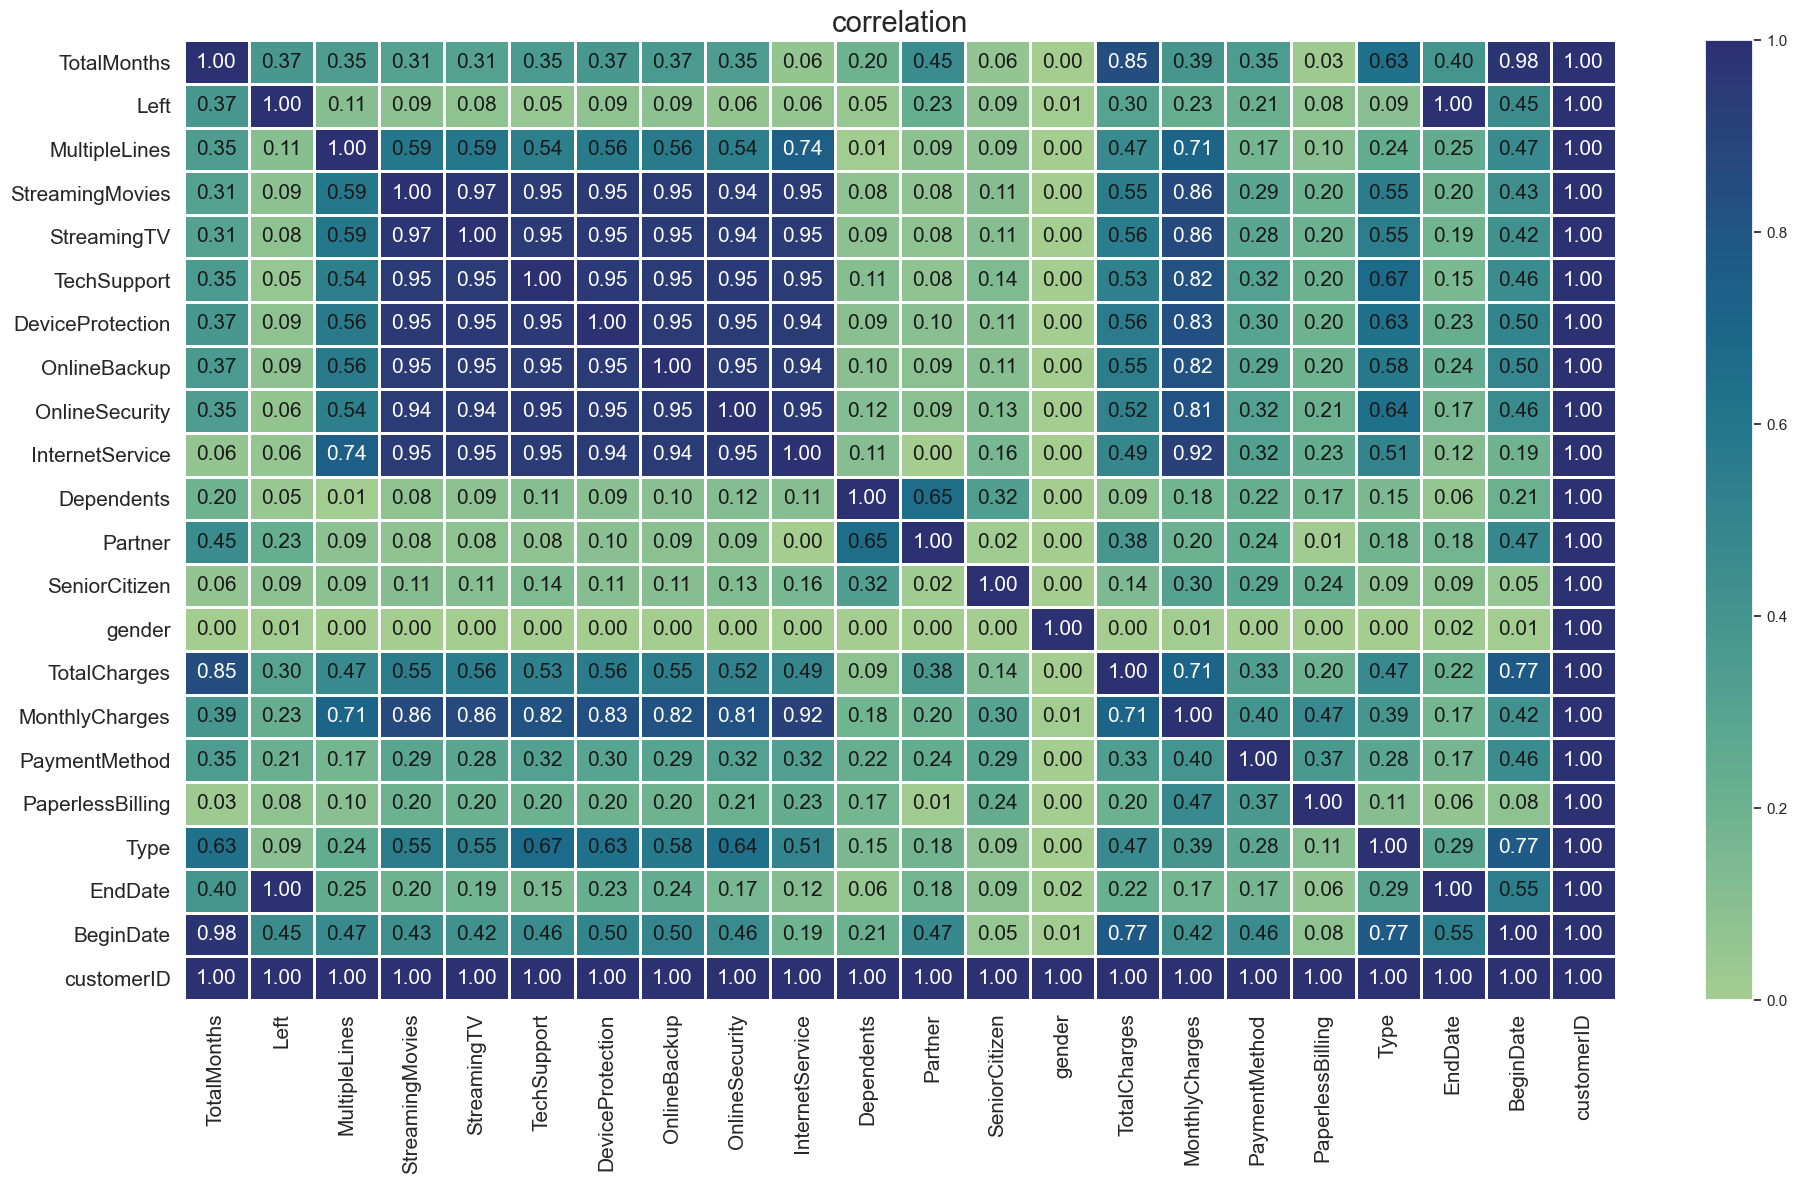

In [37]:
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       color_map= "crest",
                       fontsize_factor = 1.5,
                       figsize = (20, 12))
plt.show();

Между многими признаками наблюдается сильная положительная корреляция (более 0.8).

Так как в данном проекте не планируется использование линейной модели удалять сильно коррелирующие признаки не будем. 

### Исследование числовых признаков.

Напишем функции для построения графиков.

In [38]:
# функция для построения графиков для исследования числовых признаков
def oneplot(df=data, title1='', xl='', yl='', height=4, width=14):
    
    fig, ax = plt.subplots()
    
    plt.rcParams['font.size'] = '15'
    
    ax.minorticks_on()
    
    line = sns.lineplot(data=df, palette='magma',linewidth=2, dashes=False)
    
    line.set_title(title1, fontdict={'fontsize': 15})
    line.set_ylabel(yl, fontdict={'fontsize': 12})
    line.set_xlabel(xl, fontdict={'fontsize': 12})
    
    plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    ax.grid(which='minor',color = 'lightblue', linewidth = 1, linestyle=':')
    
    fig.set_figheight(height)
    fig.set_figwidth(width)
    return line

In [39]:
# функция для построения графиков для исследования числовых признаков
def kdeplot(data, xlabel1='',
                 figsize_1=(14, 5), label1='', suptitle1='', ylabel1='', lg='', hue1=None):
    
    fig, ax = plt.subplots(figsize=figsize_1)

    fig.suptitle(suptitle1, fontsize=16)

    kdeplot_t = sns.kdeplot(data, color='mediumblue', 
                            alpha=.4, shade=True, label=label1, hue=hue1) 

    kdeplot_t.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    
    kdeplot_t.set_xlabel(xlabel1, fontsize=14)
    kdeplot_t.set_ylabel(ylabel1, fontsize=14)
    
    return kdeplot_t

In [40]:
# функция для построения графиков для исследования категориальных признаков
def barplot_sns(df, X, Y, title1='', xlabel1='', ylabel1='', rotation_x=0, figsize_1=(14, 5), h=None):    
    
    fig, ax = plt.subplots(figsize=figsize_1)
    
    bar = sns.barplot(data=df, x=X, y=Y, palette='mako', hue=h)
    
    bar.set_title(title1, fontdict={'fontsize': 14})
    
    bar.set_xlabel(xlabel1, fontsize=14)
    bar.set_ylabel(ylabel1, fontsize=14)
    
    plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    
    plt.xticks(rotation=rotation_x)
    
    return bar

**Рассмотрим влияние срока действия договоров оказания услуг на отток клиентов.**

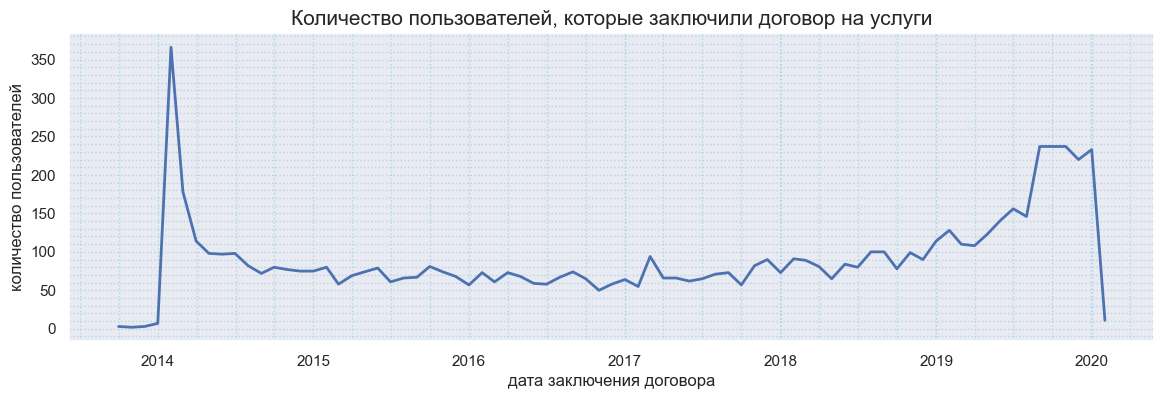

In [41]:
oneplot(df=(data['BeginDate'].value_counts().sort_index(ascending=True)),
        title1='Количество пользователей, которые заключили договор на услуги', 
        xl='дата заключения договора', 
        yl='количество пользователей')
plt.show()


Более 300 клиентов заключили договор на услуги в 2014 году - это самый хороший показатель за исследуемый период. Второй пик притока клиентов наблюдается со второй половины 2019 года. В промежутке между этими датами среднее количество новых клиентов наблюдается в районе 100 человек.

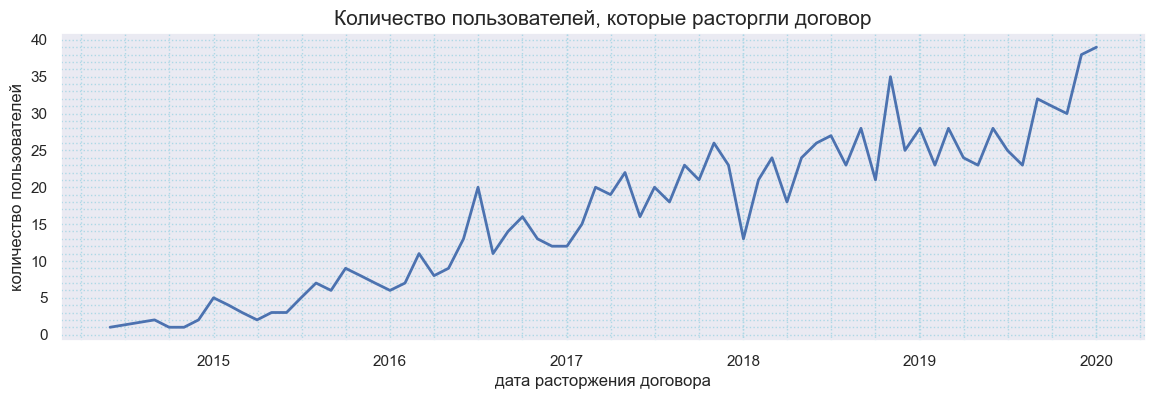

In [42]:
oneplot(df=((data.loc[data['EndDate'] < '2020-02-01']['EndDate']).value_counts().sort_index(ascending=True)),
        title1='Количество пользователей, которые расторгли договор', 
        xl='дата расторжения договора', 
        yl='количество пользователей')
plt.show()

Как видим, количество пользователей которые расторгли договор с каждым годом увеличивается. Посмотрим что же влияет на отток клиентов и кто из них чаще всего уходит.

Посмотрим через какое количество месяцев с момента заключения договора чаще всего уходят клиенты.

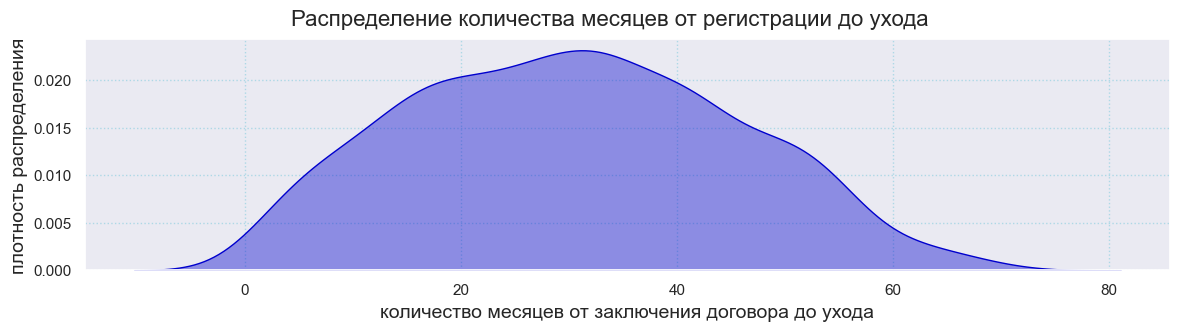

In [43]:
kdeplot(data=data.loc[data['Left'] == 1]['TotalMonths'], 
        xlabel1='количество месяцев от заключения договора до ухода', 
        figsize_1=(14, 3), 
        suptitle1='Распределение количества месяцев от регистрации до ухода', 
        ylabel1='плотность распределения', 
        lg='количество месяцев')
plt.show()

In [44]:
data.loc[data['Left'] == 1]['TotalMonths'].describe().T

count   1,101.00
mean       30.39
std        15.07
min         0.92
25%        18.96
50%        30.06
75%        41.04
max        69.95
Name: TotalMonths, dtype: float64

Длительность контракта ушедших клиентов от 0 до 70 месяцев. Наибольшее количество расторжений договоров приходится на срок действия договора от 20 до 40 месяцев. Таким образом, средняя продолжительность действия договора 30 месяцев или 2.5 года.

**Посмотрим стоимость услуг для ушедших и оставшихся клиентов.**

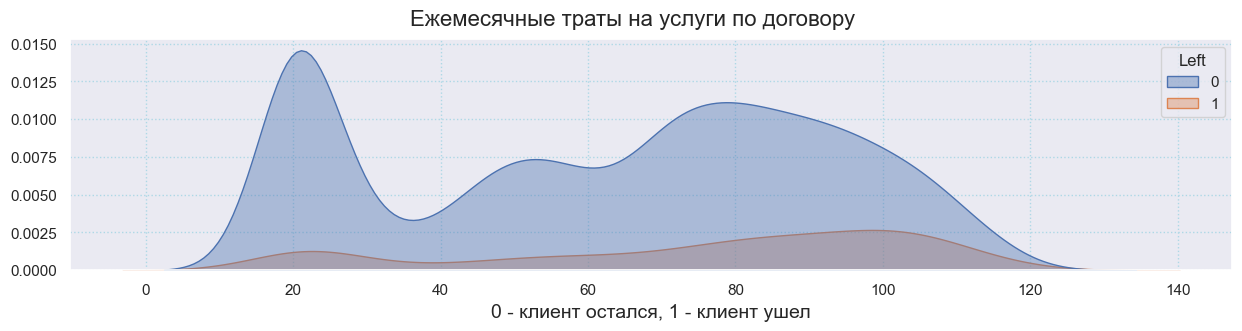

In [45]:
kdeplot(data['MonthlyCharges'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Ежемесячные траты на услуги по договору', 
        ylabel1='', hue1=data['Left'])
plt.show()


In [46]:
data[['Left', 'MonthlyCharges', 'TotalCharges', 'TotalMonths']].groupby(by='Left').median()

,MonthlyCharges,TotalCharges,TotalMonths
Left,,,
0,69.20,"1,194.28",23.06
1,84.20,"2,139.03",30.06


Проанализировав размер платы за услуги ушедших клиентов видим, что ежемесячные расходы по договору ушедших клиентов составляли ориентировочно 100 рублей. В среднем ежемесячные услуги были на 20% выше.

### Исследование категориальных признаков.

Проанализируем тип оплаты клиентов.

In [47]:
def share(column_, df=data):
    
    tabl = data[['Left',
                'customerID',
                 column_]].groupby(by=['Left', 
                        column_]).count().sort_values(by=['Left', 'customerID'], 
                                                                         ascending=False).reset_index()
    tabl['share_all'] = tabl['customerID'] / (tabl['customerID'].sum())
                                              
    tabl['share_Left'] = 0
    
    tabl.loc[tabl['Left']==0, 'share_Left'] = tabl['customerID'] / (df['Left'].value_counts()[0])
    
    tabl.loc[tabl['Left']==1, 'share_Left'] = tabl['customerID'] / (df['Left'].value_counts()[1])
    
    tabl[['share_Left', 'share_all']] = np.round((tabl[['share_Left', 'share_all']]), 2)
    
    return tabl

**Тип оплаты.**

In [48]:
Type_= share(column_='Type')
Type_

,Left,Type,customerID,share_all,share_Left
0,1,month,407,0.06,0.37
1,1,two year,381,0.05,0.35
2,1,one year,313,0.04,0.28
3,0,month,3468,0.49,0.58
4,0,two year,1314,0.19,0.22
5,0,one year,1160,0.16,0.20


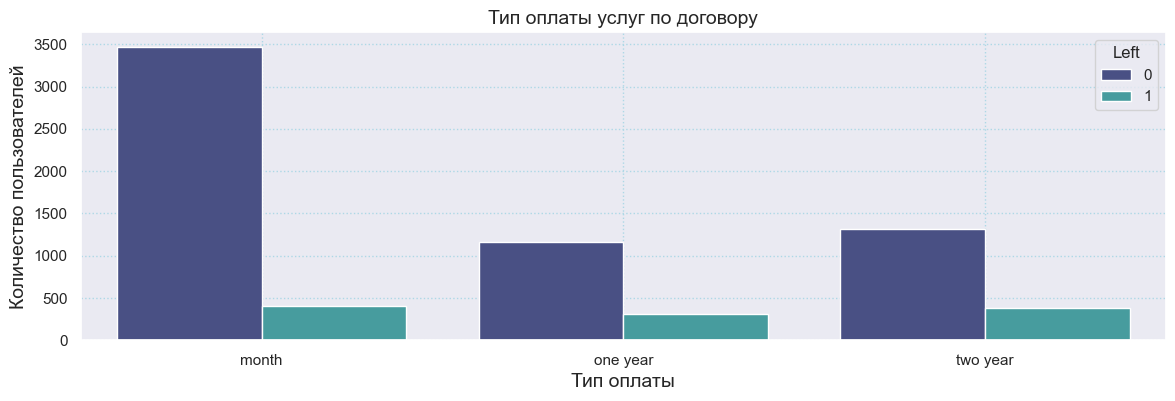

In [49]:
barplot_sns(Type_, X=Type_['Type'], Y=Type_['customerID'], 
            title1='Тип оплаты услуг по договору', xlabel1='Тип оплаты', 
            ylabel1='Количество пользователей', 
            figsize_1=(14, 4), h='Left')
plt.show()

Тип оплаты услуг по договору (ежемесячно, раз в год или раз в два года) не влияет на отток клиентов - 0.6%-0.5%-0.4% соответственно от общего количества пользователей. Их почти одинаковое количество во всех предлагаемых вариантах. Однако если смотреть на процентное соотношение ко всем пользователям, то среди пользователей, использующих тип оплаты раз в месяц наблюдается меньший процент оттока клиентов.  

In [50]:
doc_form = share(column_='PaperlessBilling')
doc_form

,Left,PaperlessBilling,customerID,share_all,share_Left
0,1,Yes,721,0.10,0.65
1,1,No,380,0.05,0.35
2,0,Yes,3450,0.49,0.58
3,0,No,2492,0.35,0.42


65% от количества ушедших клиентов получали электронные счета на оплату, но это конечно же не связано с причиной ухода, а является скорее всего показателем вовлеченности клиентов в электронные способы оплаты услуг. Как правило бумажные документы на оплату предпочитают люди преклонного возраста. 

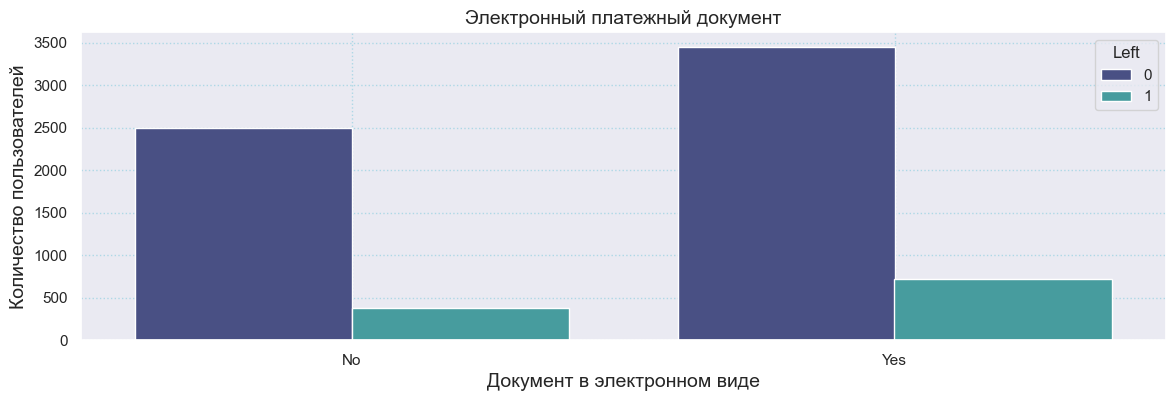

In [51]:
barplot_sns(doc_form, X=doc_form['PaperlessBilling'], Y=doc_form['customerID'], 
            title1='Электронный платежный документ', xlabel1='Документ в электронном виде', 
            ylabel1='Количество пользователей', 
            figsize_1=(14, 4), h=doc_form['Left'])
plt.show()

In [52]:
pay_method = share(column_='PaymentMethod')
pay_method

,Left,PaymentMethod,customerID,share_all,share_Left
0,1,electronic check,350,0.05,0.32
1,1,bank transfer (automatic),317,0.05,0.29
2,1,credit card (automatic),317,0.05,0.29
3,1,mailed check,117,0.02,0.11
4,0,electronic check,2015,0.29,0.34
5,0,mailed check,1495,0.21,0.25
6,0,bank transfer (automatic),1227,0.17,0.21
7,0,credit card (automatic),1205,0.17,0.20


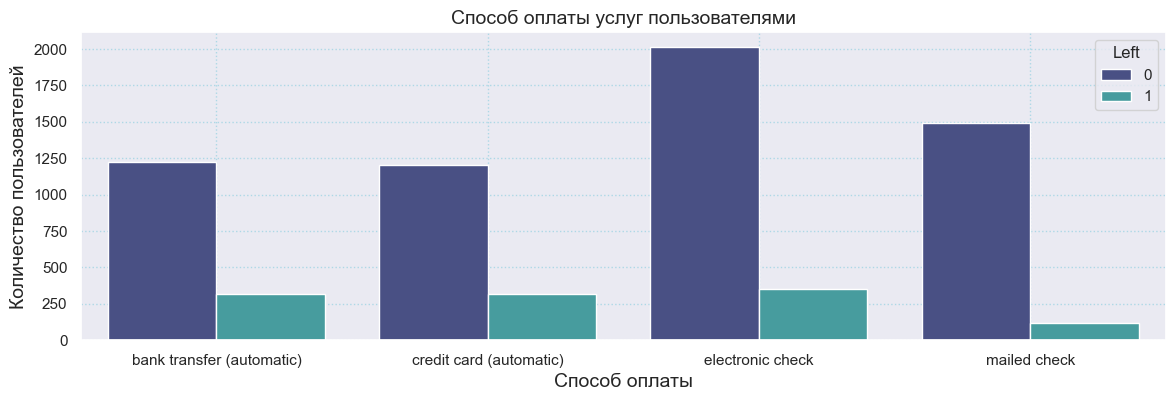

In [53]:
barplot_sns(pay_method, X=pay_method['PaymentMethod'], Y=pay_method['customerID'], 
            title1='Способ оплаты услуг пользователями', xlabel1='Способ оплаты', 
            ylabel1='Количество пользователей', 
            figsize_1=(14, 4), h=pay_method['Left'])
plt.show()

Ушедшие клиенты реже всего использовали способ оплаты по чеку, отправленному по почте. Остальные три доступных способа оплаты использовались в равной степени. 

**Проанализируем как связан уход клиента с информацией о гендерной принадлежности, наличии супруга(и), иждивенцев, пенсионного статуса по возрасту.**

In [54]:
for i in ['gender', 'SeniorCitizen', 'Partner','Dependents']:
    display(share(column_=i))

,Left,gender,customerID,share_all,share_Left
0,1,male,573,0.08,0.52
1,1,female,528,0.07,0.48
2,0,male,2982,0.42,0.50
3,0,female,2960,0.42,0.50


,Left,SeniorCitizen,customerID,share_all,share_Left
0,1,0,869,0.12,0.79
1,1,1,232,0.03,0.21
2,0,0,5032,0.71,0.85
3,0,1,910,0.13,0.15


,Left,Partner,customerID,share_all,share_Left
0,1,Yes,719,0.10,0.65
1,1,No,382,0.05,0.35
2,0,No,3259,0.46,0.55
3,0,Yes,2683,0.38,0.45


,Left,Dependents,customerID,share_all,share_Left
0,1,No,733,0.10,0.67
1,1,Yes,368,0.05,0.33
2,0,No,4200,0.60,0.71
3,0,Yes,1742,0.25,0.29


Визуализируем на графике значимые признаки.

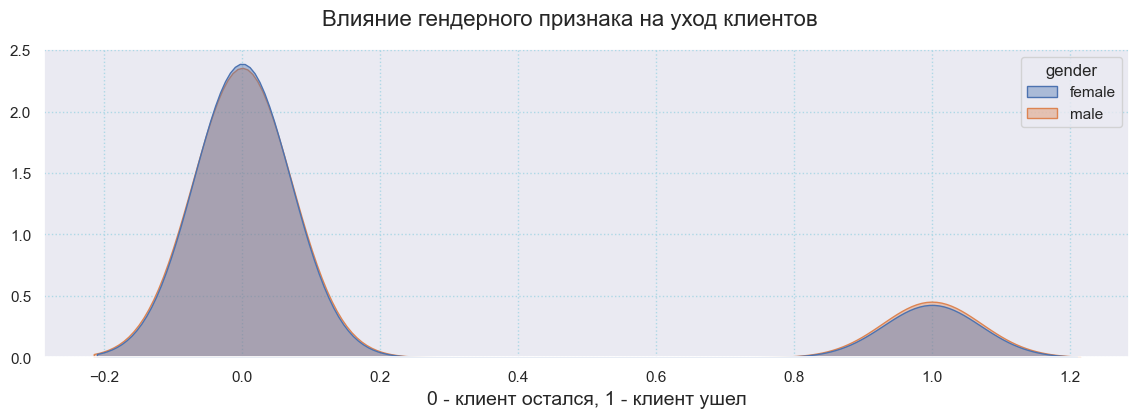

In [55]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(14, 4), 
        suptitle1='Влияние гендерного признака на уход клиентов', 
        ylabel1='', hue1=data['gender'])
plt.show()

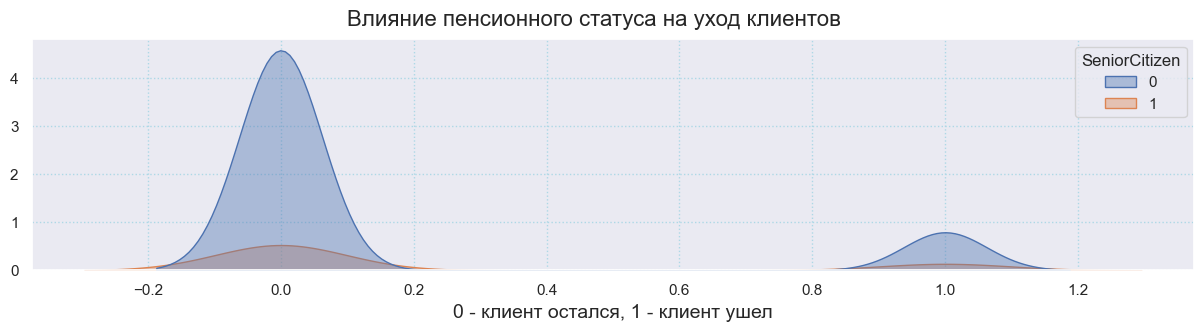

In [56]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние пенсионного статуса на уход клиентов', 
        ylabel1='', hue1=data['SeniorCitizen'])
plt.show()

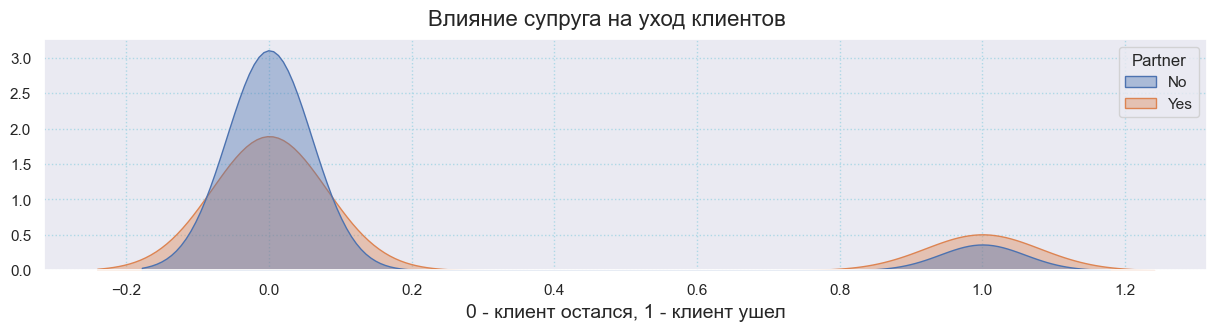

In [57]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние супруга на уход клиентов', 
        ylabel1='', hue1=data['Partner'])
plt.show()

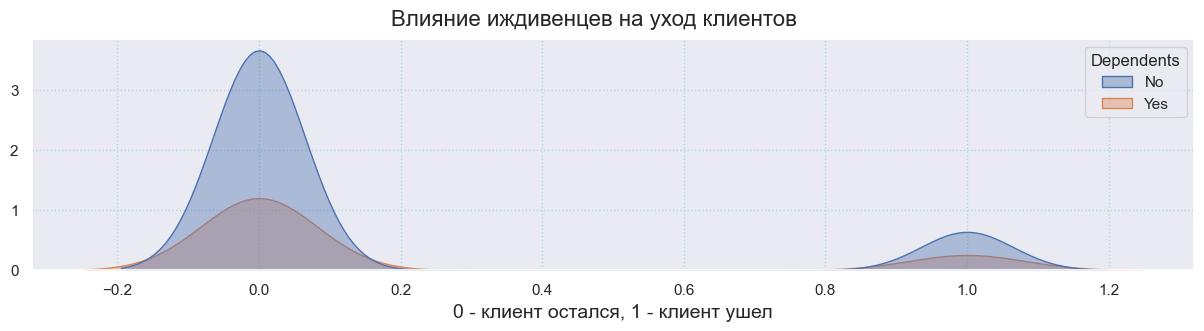

In [58]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние иждивенцев на уход клиентов', 
        ylabel1='', hue1=data['Dependents'])
plt.show()

Как видим, гендерная принадлежность не влияет на уход клиента. Большинство ушедших клиентов не имеют пенсионного статуса, чаще всего в браке и преобладают клиенты без иждивенцев.

**Проанализируем услуги, которыми пользовались ушедшие клиенты.**

In [59]:
int_type = share(column_='InternetService')
int_type

,Left,InternetService,customerID,share_all,share_Left
0,1,Fiber optic,595,0.08,0.54
1,1,DSL,346,0.05,0.31
2,1,NotUsed,160,0.02,0.15
3,0,Fiber optic,2501,0.36,0.42
4,0,DSL,2075,0.29,0.35
5,0,NotUsed,1366,0.19,0.23


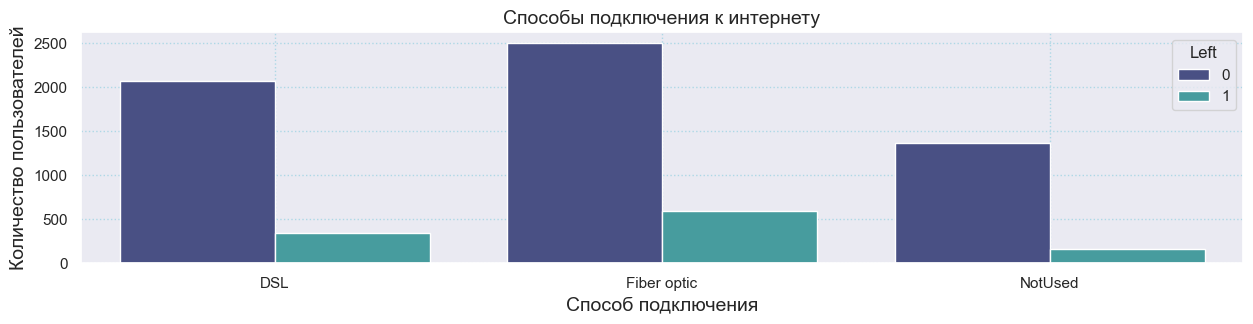

In [60]:
barplot_sns(int_type, X=int_type['InternetService'], Y=int_type['customerID'], 
            title1='Способы подключения к интернету', xlabel1='Способ подключения', 
            ylabel1='Количество пользователей', 
            figsize_1=(15, 3), h=int_type['Left'])
plt.show()

54% отказавшихся от услуг клиентов были подключены к интернету через Fiber optic, 31% - через DSL и о типе подключения оставшихся 15% ушедших пользователей ничего не известно.

Не думаю что тип подключения сыграл большую роль в уходе клиента, так как примерно такие же пропорции присутствуют у действующих клиентов.

In [61]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
          'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']:
    display(share(column_=i))

,Left,OnlineSecurity,customerID,share_all,share_Left
0,1,No,526,0.07,0.48
1,1,Yes,415,0.06,0.38
2,1,NotUsed,160,0.02,0.15
3,0,No,2972,0.42,0.50
4,0,Yes,1604,0.23,0.27
5,0,NotUsed,1366,0.19,0.23


,Left,OnlineBackup,customerID,share_all,share_Left
0,1,Yes,560,0.08,0.51
1,1,No,381,0.05,0.35
2,1,NotUsed,160,0.02,0.15
3,0,No,2707,0.38,0.46
4,0,Yes,1869,0.27,0.31
5,0,NotUsed,1366,0.19,0.23


,Left,DeviceProtection,customerID,share_all,share_Left
0,1,Yes,550,0.08,0.50
1,1,No,391,0.06,0.36
2,1,NotUsed,160,0.02,0.15
3,0,No,2704,0.38,0.46
4,0,Yes,1872,0.27,0.32
5,0,NotUsed,1366,0.19,0.23


,Left,TechSupport,customerID,share_all,share_Left
0,1,No,543,0.08,0.49
1,1,Yes,398,0.06,0.36
2,1,NotUsed,160,0.02,0.15
3,0,No,2930,0.42,0.49
4,0,Yes,1646,0.23,0.28
5,0,NotUsed,1366,0.19,0.23


,Left,StreamingTV,customerID,share_all,share_Left
0,1,Yes,584,0.08,0.53
1,1,No,357,0.05,0.32
2,1,NotUsed,160,0.02,0.15
3,0,No,2453,0.35,0.41
4,0,Yes,2123,0.30,0.36
5,0,NotUsed,1366,0.19,0.23


,Left,StreamingMovies,customerID,share_all,share_Left
0,1,Yes,606,0.09,0.55
1,1,No,335,0.05,0.30
2,1,NotUsed,160,0.02,0.15
3,0,No,2450,0.35,0.41
4,0,Yes,2126,0.30,0.36
5,0,NotUsed,1366,0.19,0.23


,Left,MultipleLines,customerID,share_all,share_Left
0,1,Yes,678,0.10,0.62
1,1,No,320,0.05,0.29
2,1,NotUsed,103,0.01,0.09
3,0,No,3070,0.44,0.52
4,0,Yes,2293,0.33,0.39
5,0,NotUsed,579,0.08,0.10


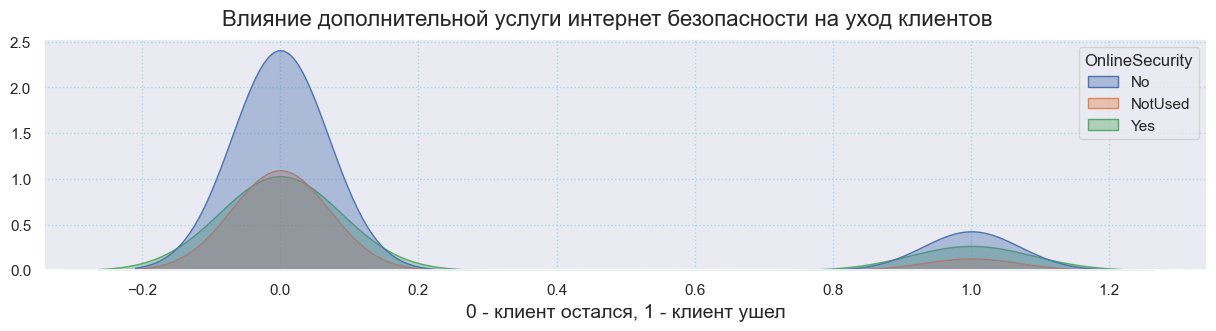

In [62]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги интернет безопасности на уход клиентов', 
        ylabel1='', hue1=data['OnlineSecurity'])
plt.show()

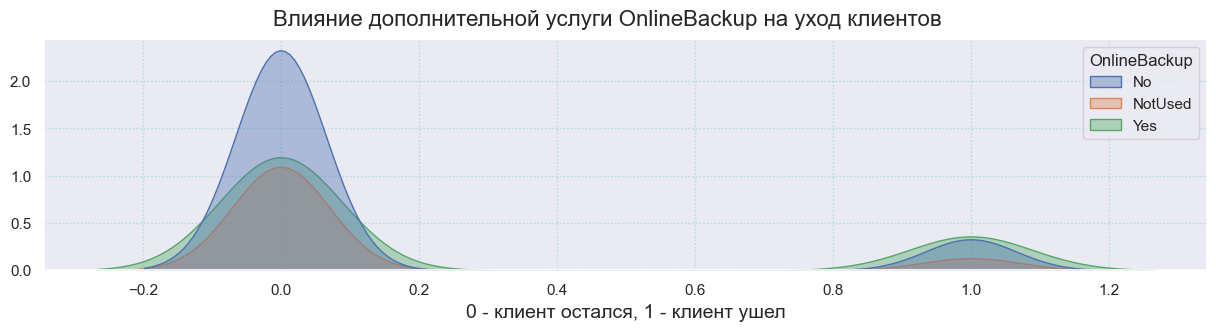

In [63]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги OnlineBackup на уход клиентов', 
        ylabel1='', hue1=data['OnlineBackup'])
plt.show()

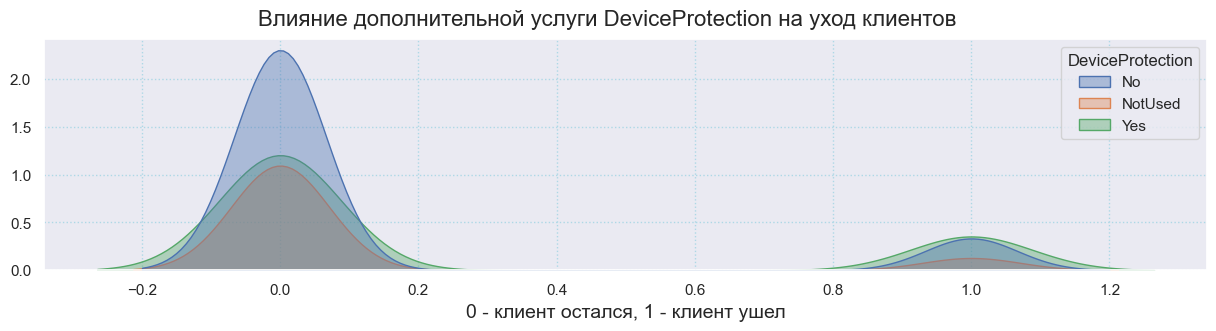

In [64]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги DeviceProtection на уход клиентов', 
        ylabel1='', hue1=data['DeviceProtection'])
plt.show()

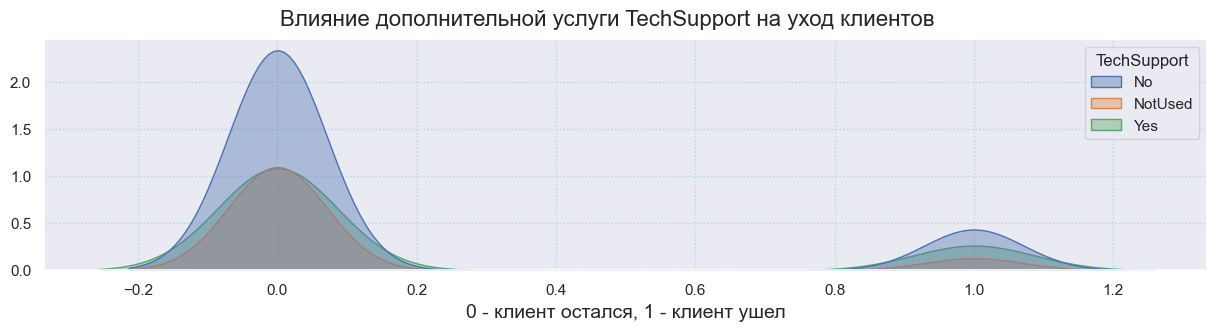

In [65]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги TechSupport на уход клиентов', 
        ylabel1='', hue1=data['TechSupport'])
plt.show()

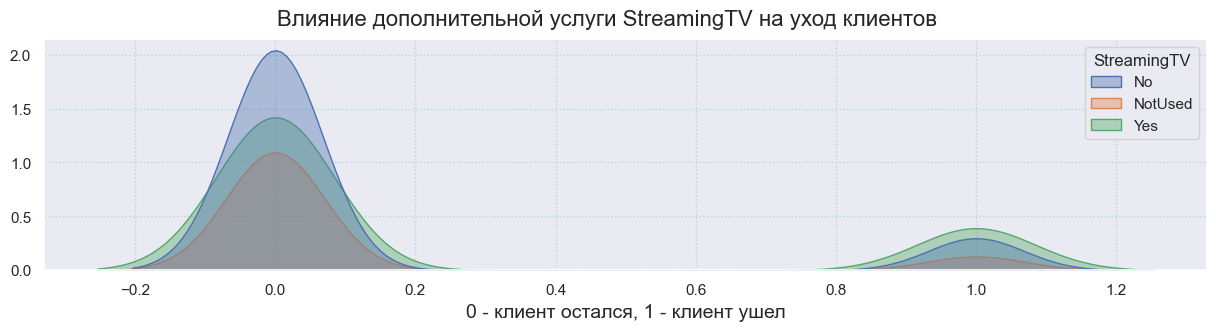

In [66]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги StreamingTV на уход клиентов', 
        ylabel1='', hue1=data['StreamingTV'])
plt.show()

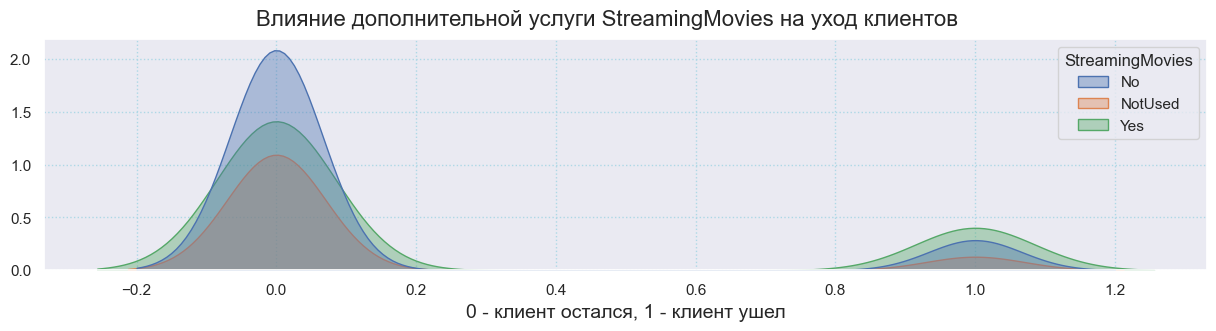

In [67]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги StreamingMovies на уход клиентов', 
        ylabel1='', hue1=data['StreamingMovies'])
plt.show()

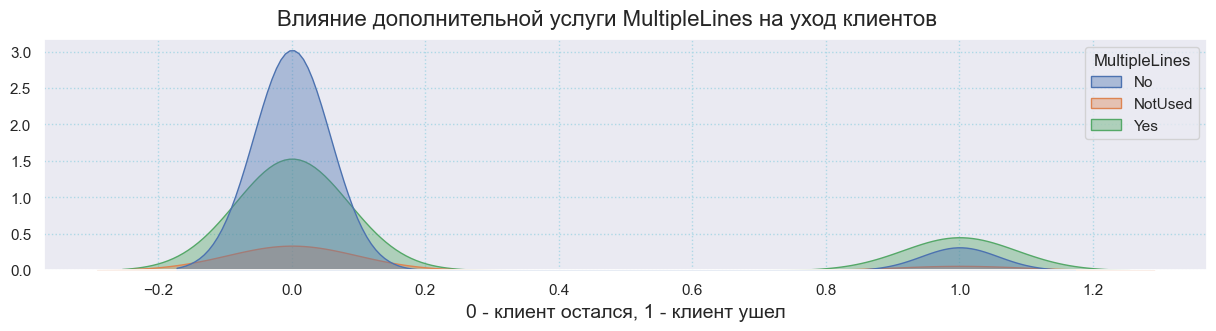

In [68]:
kdeplot(data['Left'], xlabel1='0 - клиент остался, 1 - клиент ушел',figsize_1=(15, 3), 
        suptitle1='Влияние дополнительной услуги MultipleLines на уход клиентов', 
        ylabel1='', hue1=data['MultipleLines'])
plt.show()

В большинстве своем ушедшим клиентам не были подключены дополнительные услуги. Однако стоит заметить, что разница между ушедшими клиентами которые пользовались и не пользовались ими незначительная, по сравнению с разницей у действующих клиентов. 

**ВЫВОДЫ:**

В данном разделе проекта мы проанализировали дисбаланс классов в целевом признаке.
Выявили значительный дисбаланс классов. 15.6% из всех пользователей расторгли договора оказания услуг. Для обучения моделей уравняем веса методом class_weight.

Посмотрели корреляции признаков. 

Между многими признаками наблюдается сильная положительная корреляция (более 0.8).

Так как в данном проекте не планируется использование линейной модели удалять сильно коррелирующие признаки не будем. 

Изучили признаки. Выяснили, что более 300 клиентов заключили договор на услуги в 2014 году - это самый хороший показатель за исследуемый период. Второй пик притока клиентов наблюдается со второй половины 2019 года. В промежутке между этими датами среднее количество новых клиентов в районе 100 человек. 

Анализ ухода клиентов за исследуемый период выявил, что, количество пользователей которые расторгли договор с каждым годом увеличивается. 

Длительность контракта ушедших клиентов от 0 до 70 месяцев. Наибольшее количество расторжений договоров приходится на срок действия договора от 20 до 40 месяцев. Таким образом, средняя продолжительность действия договора 30 месяцев или 2.5 года. 


Дальнейшие исследования данных показали, что:

- тип оплаты услуг по договору (ежемесячно, раз в год или раз в два года) не влияет на отток клиентов - 0.6%-0.5%-0.4% соответственно от общего количества пользователей. Их почти одинаковое количество во всех предлагаемых вариантах. Однако если смотреть на процентное соотношение ко всем пользователям, то среди пользователей, использующих тип оплаты раз в месяц наблюдается меньший процент оттока клиентов.  

- 65% от количества ушедших клиентов получали электронные счета на оплату, но это конечно же не связано с причиной ухода, а является скорее всего показателем вовлеченности клиентов в электронные способы оплаты услуг. Как правило бумажные документы на оплату предпочитают люди преклонного возраста. 

- гендерная принадлежность не влияет на уход клиента. Мы можем видеть, что ушедшие клиенты как правило не имеют пенсионного статуса, чаще всего в браке и большинство из них без иждивенцев.

- 54% отказавшихся от услуг клиентов были подключены к интернету через Fiber optic, 31% - через DSL и о типе подключения оставшихся 15% ушедших пользователей ничего не известно. Не думаю что тип подключения сыграл большую роль в уходе клиента, так как примерно такие же пропорции присутствуют у действующих клиентов.

- в большинстве своем ушедшим клиентам не были подключены дополнительные услуги. Однако стоит заметить, что разница между ушедшими клиентами которые пользовались и не пользовались ими незначительная, по сравнению с разницей у действующих клиентов. 


## Подготовка данных для машинного обучения.

### Удаление не информативных признаков.

In [69]:
data.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Left,TotalMonths
0,7590-VHVEG,2020-01-01,2020-02-01,month,Yes,electronic check,29.85,31.04,female,0,...,DSL,No,Yes,No,No,No,No,NotUsed,0,1.02
1,5575-GNVDE,2017-04-01,2020-02-01,one year,No,mailed check,56.95,"2,071.84",male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,34.04
2,3668-QPYBK,2019-10-01,2020-02-01,month,Yes,mailed check,53.85,226.17,male,0,...,DSL,Yes,Yes,No,No,No,No,No,0,4.04


In [70]:
data = data.drop(columns=['BeginDate', 'EndDate', 'customerID', 'TotalCharges'])

In [71]:
data.head(3)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Left,TotalMonths
0,month,Yes,electronic check,29.85,female,0,Yes,No,DSL,No,Yes,No,No,No,No,NotUsed,0,1.02
1,one year,No,mailed check,56.95,male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,34.04
2,month,Yes,mailed check,53.85,male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,4.04


Удалили неинформативные признаки 'BeginDate', 'EndDate' и 'customerID'.

### Разделение на выборки, кодирование и масштабирование признаков.

Создадим переменные для признаков и целевого признака и разделим данные на на train и test в соотношении 3 к 1. И определим числовые и категориальные признаки.

In [72]:
# создим переменные для признаков и целевого признака
X=data.drop(['Left'],axis=1) 
y=data['Left'] 

In [73]:
# разделим данные на на train и test в соотношении 3 к 1
X_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE)

In [74]:
# проверим размеры выборок 
print('Размер тренировочной выборки (признаки) :', X_train.shape, 
          'Размер тренировочной выборки (целевой признак):', y_train.shape, sep='\n')
print('Размер тестовой выборки (признаки):', x_test.shape, 
          'Размер тестовой выборки (целевой признак):', y_test.shape, sep='\n')

Размер тренировочной выборки (признаки) :
(5282, 17)
Размер тренировочной выборки (целевой признак):
(5282,)
Размер тестовой выборки (признаки):
(1761, 17)
Размер тестовой выборки (целевой признак):
(1761,)


**Кодирование признаков.**

Подготовим три типа признаков:

- для модели LGBM ранее привели категориальные признаки к типу category, тогда модель будет работать с категориальными признаками автоматически,

- для модели RandomForest будем использовать метод OrdinalEncoder() - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил,

- для модели CatBoostRegressor будем использовать внутренние кодировщики, которые работают лучше сторонних. В модели CatBoost за это отвечает параметр cat_features.

**Подготовка признаков для модели RF.**

**Метод OrdinalEncoder() кодирование категориальных признаков.**

Для модели RandomForest будем использовать метод OrdinalEncoder().

In [75]:
data_oe = data.copy()

In [76]:
cat = data_oe.select_dtypes('category').columns.to_list()
num = data_oe.select_dtypes('float64', 'int64').columns.to_list()

In [77]:
print(cat)
print('-'*20)
print(num)

['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
--------------------
['MonthlyCharges', 'TotalMonths']


In [78]:
X_oe=data_oe.drop(['Left'],axis=1) 
y_oe=data_oe['Left'] 

In [79]:
# разделим данные на на train и test в соотношении 3 к 1
X_train_oe, x_test_oe, y_train_oe, y_test_oe = train_test_split(X_oe, y_oe, 
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE)


In [80]:
# проверим размеры выборок 
print('Размер тренировочной выборки (признаки) :', X_train_oe.shape, 
          'Размер тренировочной выборки (целевой признак):', y_train_oe.shape, sep='\n')
print('Размер тестовой выборки (признаки):', x_test_oe.shape, 
          'Размер тестовой выборки (целевой признак):', y_test_oe.shape, sep='\n')

Размер тренировочной выборки (признаки) :
(5282, 17)
Размер тренировочной выборки (целевой признак):
(5282,)
Размер тестовой выборки (признаки):
(1761, 17)
Размер тестовой выборки (целевой признак):
(1761,)


In [81]:
X_train_oe.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TotalMonths
5315,month,Yes,electronic check,45.60,male,0,No,No,DSL,No,No,No,No,No,No,No,5.03
1294,month,No,electronic check,44.75,male,0,No,No,DSL,No,No,No,No,No,No,No,9.07
4861,one year,Yes,bank transfer (automatic),58.95,female,1,Yes,No,DSL,No,Yes,No,No,No,Yes,No,48.00
2469,one year,No,mailed check,20.00,female,0,No,No,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,29.01
278,month,Yes,electronic check,55.00,male,0,No,No,DSL,No,No,Yes,Yes,Yes,Yes,NotUsed,14.03


In [82]:
x_test_oe.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TotalMonths
2248,month,Yes,bank transfer (automatic),54.45,male,0,Yes,Yes,DSL,Yes,No,No,No,No,No,Yes,30.03
5204,month,Yes,electronic check,24.85,male,1,Yes,No,DSL,No,No,No,No,No,No,NotUsed,38.01
6865,two year,No,mailed check,65.50,female,0,Yes,No,DSL,Yes,No,No,Yes,No,Yes,No,8.05
1667,one year,Yes,credit card (automatic),24.80,male,0,No,No,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,Yes,11.01
6947,one year,Yes,credit card (automatic),101.05,male,0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Yes,68.04


In [83]:
# оставила как вариант
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [84]:
oe.fit(X_train_oe[cat])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [85]:
# оставила как вариант
X_train_oe[cat] = oe.transform(X_train_oe[cat])
x_test_oe[cat] = oe.transform(x_test_oe[cat])

In [86]:
# оставила как вариант
X_train_oe.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TotalMonths
5315,0.00,1.00,2.00,45.60,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.03
1294,0.00,0.00,2.00,44.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.07
4861,1.00,1.00,0.00,58.95,0.00,1.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,48.00
2469,1.00,0.00,3.00,20.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,29.01
278,0.00,1.00,2.00,55.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,2.00,1.00,14.03


In [87]:
# оставила как вариант
x_test_oe.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TotalMonths
2248,0.00,1.00,0.00,54.45,1.00,0.00,1.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,30.03
5204,0.00,1.00,2.00,24.85,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38.01
6865,2.00,0.00,3.00,65.50,0.00,0.00,1.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,2.00,0.00,8.05
1667,1.00,1.00,1.00,24.80,1.00,0.00,0.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,11.01
6947,1.00,1.00,1.00,101.05,1.00,0.00,1.00,1.00,1.00,0.00,2.00,0.00,0.00,2.00,2.00,2.00,68.04


**Масштабирование признаков методом StandardScaler().**

In [88]:
# оставила как вариант
scaler=StandardScaler()
scaler.fit(X_train_oe[num])

X_train_oe[num]=scaler.transform(X_train_oe[num])
x_test_oe[num]=scaler.transform(x_test_oe[num]) 

X_train_oe.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TotalMonths
5315,0.00,1.00,2.00,-0.63,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.10
1294,0.00,0.00,2.00,-0.66,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.92
4861,1.00,1.00,0.00,-0.19,0.00,1.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.84
2469,1.00,0.00,3.00,-1.49,0.00,0.00,0.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,-0.02
278,0.00,1.00,2.00,-0.32,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,2.00,1.00,-0.70


**ВЫВОДЫ:**

В данном разделе проекта мы удалили неинформативные признаки 'BeginDate', 'EndDate', 'customerID' и 'TotalCharges'.

Изменили тип данных object на category для бустинговых моделей, создали переменные для признаков и целевого признака и разделили данные на train и test в соотношении 3 к 1.

В результате размер тренировочной выборки составил 5282 строки, размер тестовой  выборки 1761.

По условиям задания RANDOM_STATE = 140823.

Для обучения модели RandomForest подготовили признаки:

- категориальные закодировали методом OrdinalEncoder(),
- цифровые признаки масштабировали методом StandardScaler().

Данный метод кодирования в данном проекте мы использовать не будем, но оставили его для примера и возможности использования при обучении модели RandomForest другим способом.

Для модели LGBM привели категориальные признаки к типу category.

Для модели CatBoostRegressor будем использовать внутренние кодировщики, которые работают лучше сторонних. В модели CatBoost за это отвечает параметр cat_features.

## Обучение моделей, выбор лучшей модели.

Для решения данной задачи будем использовать следующие модели машинного обучения:

- случайный лес - RandomForest;
- CatBoost;
- LightGBM.

### Случайный лес (RandomForest).

In [89]:
# трансформер для кодирования категориальных признаков методом OrdinalEncoder
col_trans_forest = ColumnTransformer(
             [('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat)],
             remainder='passthrough'
)

In [90]:
# объявим функцию для моделей RandomForest, LightGBM и CatBoost
def classifier_cv(model, params):
    
    classifier = RandomizedSearchCV(
         model, 
         params, 
         cv = StratifiedKFold(5, shuffle=True, random_state=RANDOM_STATE),
         scoring = 'roc_auc',
         n_jobs = -1,
         verbose = 10
    )
    classifier.fit(X_train, y_train)
    
    auc_cv = classifier.best_score_.round(3)  
    best_params = classifier.best_params_
    best_model = classifier.best_estimator_
    
    print('*'*10)
    print('Successfully')
    
    return auc_cv, best_params, best_model

In [91]:
# обучим модель RandomForest при помощи Pipeline
pipe_rf = Pipeline([
    ('transformer_forest', col_trans_forest),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE))
    
])
params_rf = {
    'rf__n_estimators':range(5,200,30),
    'rf__max_depth':range(3,15,5),
    'rf__min_samples_split':range(2,5),
    'rf__min_samples_leaf':range(2,5),
    'rf__criterion':['gini','entropy','log_loss']
}
auc_cv_rf, best_params_rf, best_model_rf = classifier_cv(
    pipe_rf, 
    params_rf
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
**********
Successfully


In [92]:
pd.DataFrame({'RandomForest':auc_cv_rf}, index=['ROC-AUC'])

,RandomForest
ROC-AUC,0.82


### LightGBM.

In [93]:
# обучим модель LGBM при помощи Pipeline
pipe_lgbm = Pipeline([
    ('lgbm', LGBMClassifier(objective='binary',
                            class_weight='balanced',
                            random_state=RANDOM_STATE)),
])
params_lgbm = {
    'lgbm__n_estimators':range(5,500,30),
    'lgbm__max_depth':range(3,15,5),
    'lgbm__learning_rate':[0.1,0.5],
    'lgbm__num_leaves':range(10,30,5)
}
lgbm_auc_cv, best_params_lgbm, best_model_lgbm = classifier_cv(
    pipe_lgbm, 
    params_lgbm
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 832, number of negative: 4450
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [94]:
pd.DataFrame({'LGBM':lgbm_auc_cv}, index=['ROC-AUC'])

,LGBM
ROC-AUC,0.89


### CatBoost.

In [95]:
# обучим модель CatBoost при помощи Pipeline
pipe_cb = Pipeline([
    ('catb', CatBoostClassifier(cat_features=cat,
                                eval_metric ='AUC',
                                verbose=False,
                                random_state=RANDOM_STATE))
])
params_cb = {
    'catb__iterations':[1001],#range(30,100,300,500,800, 900, 1001),
    'catb__depth':[3],#[3,6,10, 15],
    'catb__learning_rate':[0.5]#[0.1, 0.5]
}
cb_auc_cv, best_params_cb, best_model_cb = classifier_cv(
    pipe_cb, 
    params_cb,
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
**********
Successfully


In [96]:
pd.DataFrame({'CatBoost':cb_auc_cv}, index=['ROC-AUC'])

,CatBoost
ROC-AUC,0.92


### Выбор лучшей модели.

**Обобщим результаты обучения моделей.**

In [97]:
pd.DataFrame({
    'RandomForest':auc_cv_rf,
    'LGBM':lgbm_auc_cv,
    'CatBoost':cb_auc_cv
    },
    index=['ROC-AUC']
)

,RandomForest,LGBM,CatBoost
ROC-AUC,0.82,0.89,0.92


**ВЫВОДЫ:**

Для обучения моделей, кодирования признаков мы использовали модуль PipeLine.

Метрика ROC-AUC при использовании PipeLine:

- модели RandomForest - 0.82;
- модели  LightGBM - 0.89;
- модели CatBoost - 0.92.

Лучшие результаты по эффективности модели машинного обучения (метрика ROC-AUC) показала модель CatBoost.

## Тестирование модели на тестовых данных.

Протестируем лучшую модель на тестовой выборке. 

In [98]:
# тестирование лучшей модели на тестовой выборке     
cb_test = best_model_cb.predict(x_test)

# вероятности
probabilities_valid = best_model_cb.predict_proba(x_test)
probabilities_one_valid = probabilities_valid[:, 1]

# расчет метрик на тесте
auc_roc_test = roc_auc_score(y_test, probabilities_one_valid)
test_accuracy = best_model_cb.score(x_test, y_test)

# результаты проверки 
print('ROC-AUC на тестовой выборке: {:.5f}'.format(auc_roc_test))
print('Accuracy на тестовой выборке: {:.5f}'.format(test_accuracy))

ROC-AUC на тестовой выборке: 0.93423
Accuracy на тестовой выборке: 0.93583


Метрика качества модели CatBoost на тестовых данных 0.93. Данное значение превышает установленный минимальный порог метки в 0.85.

Точность предсказания модели CatBoost - метрика accuracy на тестовых данных - 0.94.

## Анализ модели.

### Построение матрицы ошибок.

Построим матрицу ошибок модели CatBoost - показатель успешности классификации.

Text(0, 0.5, 'Истинный класс')

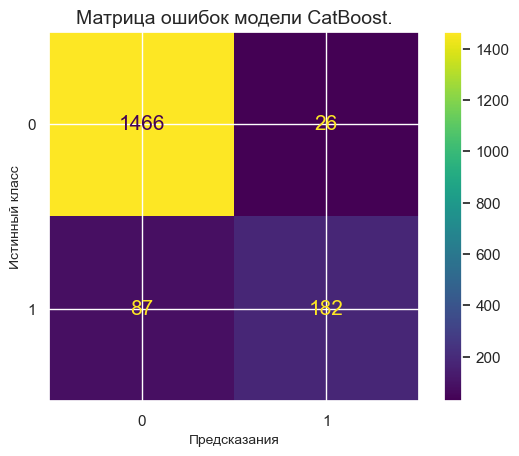

In [99]:
cm = confusion_matrix(y_test, cb_test, labels=best_model_cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_model_cb.classes_,
                              )
disp.plot()
disp.ax_.set_title("Матрица ошибок модели CatBoost.", fontdict={'fontsize':14})
disp.ax_.set_xlabel('Предсказания', fontsize=10)
disp.ax_.set_ylabel('Истинный класс', fontsize=10)
 

**Расшифровка матрицы ошибок модели CatBoost.**

После тестирования лучшей модели на тестовых данных мы получили следующие результаты:

Всего предоставлено данных для тестирования - 1761, из них:

- модель предсказала что клиент останется (класс 0) - 1492;
- модель предсказали что клиент уйдет (класс 1) - 269.

Из предсказаний, что клиент продолжит пользоваться услугами компании доля правильных ответов составила 98% (в количественном выражении составляет 1466 случая) и только в 2% модель ошиблась в предсказаниях (26 случаев было предсказано неверно - модель предсказала что клиент останется, а он расторг договор). 

Из предсказаний, что клиент уйдет доля правильных ответов составила 68% (на матрице ошибок это 182 случая) и в 38% (87 случаев) модель ошиблась в предсказаниях, предсказала что клиент уйдет, а он на самом деле он остался.

В целом можем сказать, что обученная модель на тестовых данных показала очень хорошие результаты и ее смело можно использовать для поставленных задач.

### Построение ROC -кривой.

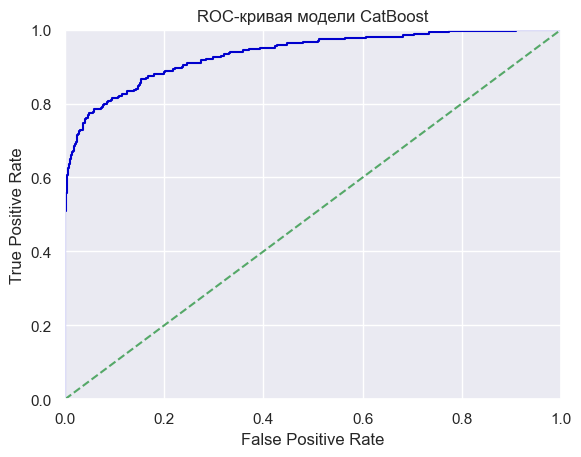

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr, color='mediumblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='g')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели CatBoost')
plt.show()

График ROC -кривой визуализировал насколько хорошо работает классификатор полученной модели. Высокое значение по оси Y указывает на большее количество истинно положительных, чем ложно отрицательных результатов.

### Исследование важности признаков лучшей модели.

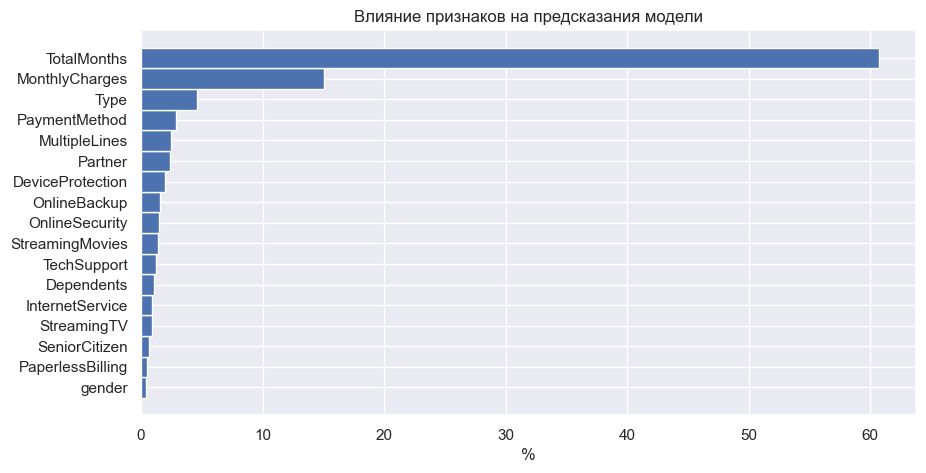

In [101]:
cb_feature = CatBoostClassifier(cat_features = cat,
                          eval_metric ='AUC',
                          verbose = False,
                          random_state = RANDOM_STATE,
                          iterations = 1001,
                          depth = 3,
                          learning_rate = 0.5).fit(X,y)

feature_sort = cb_feature.get_feature_importance().argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[feature_sort], cb_feature.get_feature_importance()[feature_sort], height=1)
plt.title('Влияние признаков на предсказания модели')
plt.xlabel('%')
plt.show()

Наибольшую важность для предсказаний в модели CatBoost имеет признак **TotalMonth** - количество месяцев, через которое клиент ушел. Для оставшихся клиентов - это разница между сбором датасета и датой регистрации договора.

Следующие по значимости пять признаков: 

- MonthlyCharges – ежемесячные траты на услуги по договору;
- Type – тип оплаты: ежемесячный, годовой и тд;
- PaymentMethod – способ оплаты;
- MultipleLines – наличие возможности ведения параллельных линий во время звонка;
- Partner – наличие супруга(и).

Остальные признаки менее значимы для модели.

**ВЫВОДЫ:**

В данной части проекта для обучения моделей, поиска лучших гиперпараметров и кодирования признаков мы использовали модуль PipeLine.

Метрика ROC-AUC моделей при использовании PipeLine:

- модели RandomForest - 0.82;
- модели  LightGBM - 0.89;
- модели CatBoost - 0.92.

Лучшие результаты по эффективности модели машинного обучения (метрика ROC-AUC) показала модель CatBoost.

Протестировали лучшую модель на тестовой выборке. 
Метрика качества модели CatBoost на тестовых данных составила 0.93. Данное значение превышает установленный минимальный порог метки в 0.85.
Точность предсказания модели CatBoost - метрика accuracy на тестовых данных - 0.94.


Построили матрицу ошибок модели CatBoost - показатель успешности классификации, которая показала что обученная модель на тестовых данных показала очень хорошие результаты и ее смело можно использовать для поставленных задач.

График ROC -кривой визуализировал насколько хорошо работает классификатор полученной модели. Высокое значение по оси Y указывает на большее количество истинно положительных, чем ложно отрицательных результатов.


Анализ важности признаков показал, что наибольшую важность для предсказаний в модели CatBoost имеет признак **TotalMonth** - количество месяцев, через которое клиент ушел. Для оставшихся клиентов - это разница между сбором датасета и датой регистрации договора.

Следующие по значимости пять признаков: 
- MonthlyCharges – ежемесячные траты на услуги по договору;
- Type – тип оплаты: ежемесячный, годовой и тд;
- PaymentMethod – способ оплаты;
- MultipleLines – наличие возможности ведения параллельных линий во время звонка;
- Partner – наличие супруга(и).

Остальные признаки менее значимы для модели.


## Отчет по проекту.

**Цель проекта:** построение модели машинного обучения для прогнозирования оттока клиентов с целью предложения таким клиентам специальных условий и промокодов. Ведь как известно, сохранить клиента легче, чем найти нового.

**Ключевые шаги работы над проектом:**

1. Загрузка необходимых библиотек, загрузка данных.

2. Знакомство с данными.

3. Объединение таблиц и предобработка данных.
   
4. Исследовательский анализ данных.
  
5. Подготовка данных для машинного обучения.
        
6. Обучение моделей RandomForest, LightGBM и CatBoost, выбор лучшей модели.
     
7. Тестирование модели на тестовых данных.

8. Анализ модели: построение матрицы ошибок, построение ROC -кривой, исследование важности признаков лучшей модели.


Работа над проектом велась по заранее сформированному плану, поэтому большие трудности в работе не возникали.

Итоговый список признаков для обучения модели:

- Left (сгенерированный признак)- целевой признак: 1- клиент ушел, 0 - клиент остался;
- TotalMonths (сгенерированный признак) - количество месяцев, через которое клиент ушел;
- MonthlyCharges - ежемесячные траты на услуги по договору;
- Type - тип оплаты: ежемесячный, годовой и тд.;
- PaymentMethod - способ оплаты;
- MultipleLines - наличие возможности ведения параллельных линий во время звонка;
- Partner - наличие супруга(и);
- Dependents - наличие иждивенцев
- InternetService - тип поделючения;
- SeniorSitizen -  наличие пенсионного статуса по возрасту;
- PaperlessBilling - электронный платёжный документ;
- gender - пол;
- DeviceProtection - интернет-безопасность: антивирус;
- OnlineBackup - Облачное хранилище файлов для резервного копирования данных
- OnlineSecurity - блокировка небезопасных сайтов;
- StreamingMovies - каталог фильмов;
- StreamingTV - стриминговое телевидение;
- TechSupport - выделенная линия технической поддержки.


Для обучения моделей, поиска лучших гиперпараметров и кодирования признаков мы использовали модуль PipeLine. Кодирование категориальных признаков производили методом OrdinalEncoder().

**Предобработка данных.**

В данном разделе мы объединили 4 таблицы в одну методом merge, создали 2 дополнительных столбца Left- целевой признак и TotalMonths. Заменили пропуски в столбцах с услугами, которые возникли после объединения таблиц, на 'NotUsed'. Для лучшего восприятия информации привели данные в некоторых столбцах к нижнему регистру. Изменили типы данных в столбцах  'BeginDate', 'EndDate', 'TotalCharges'и 'SeniorCitizen'. Изменили тип данных object на category для бустингов.

Для решения поставленной задачи мы использовали следующие модели машинного обучения:

- случайный лес - RandomForest;
- CatBoost;
- LightGBM.

Сводная таблица исследованных моделей и их метрика качества.

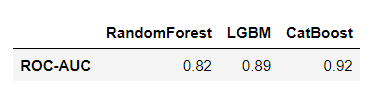

Лучшие результаты по эффективности модели машинного обучения (метрика ROC-AUC) показала модель CatBoost.

Итоговые метрики качества модели и точности предсказания модели на тестовых данных.

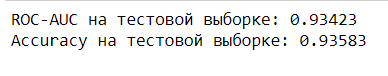

**Матрица ошибок модели CatBoost.**

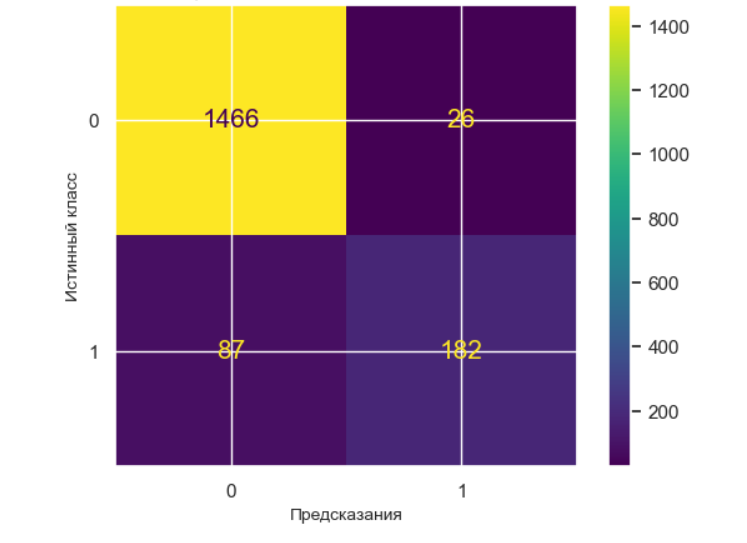

**Расшифровка матрицы ошибок.**

После тестирования лучшей модели на тестовых данных мы получили следующие результаты:

Всего предоставлено данных для тестирования - 1761, из них:

- модель предсказала что клиент останется (класс 0) - 1492;
- модель предсказали что клиент уйдет (класс 1) - 269.

Из предсказаний, что клиент продолжит пользоваться услугами компании доля правильных ответов составила 98% (в количественном выражении составляет 1466 случая) и только в 2% модель ошиблась в предсказаниях (26 случаев было предсказано неверно - модель предсказала что клиент останется, а он расторг договор). 

Из предсказаний, что клиент уйдет доля правильных ответов составила 68% (на матрице ошибок это 182 случая) и в 38% (87 случаев) модель ошиблась в предсказаниях, предсказала что клиент уйдет, а он на самом деле он остался.

В целом можем сказать, что обученная модель на тестовых данных показала очень хорошие результаты и ее смело можно использовать для поставленных задач.

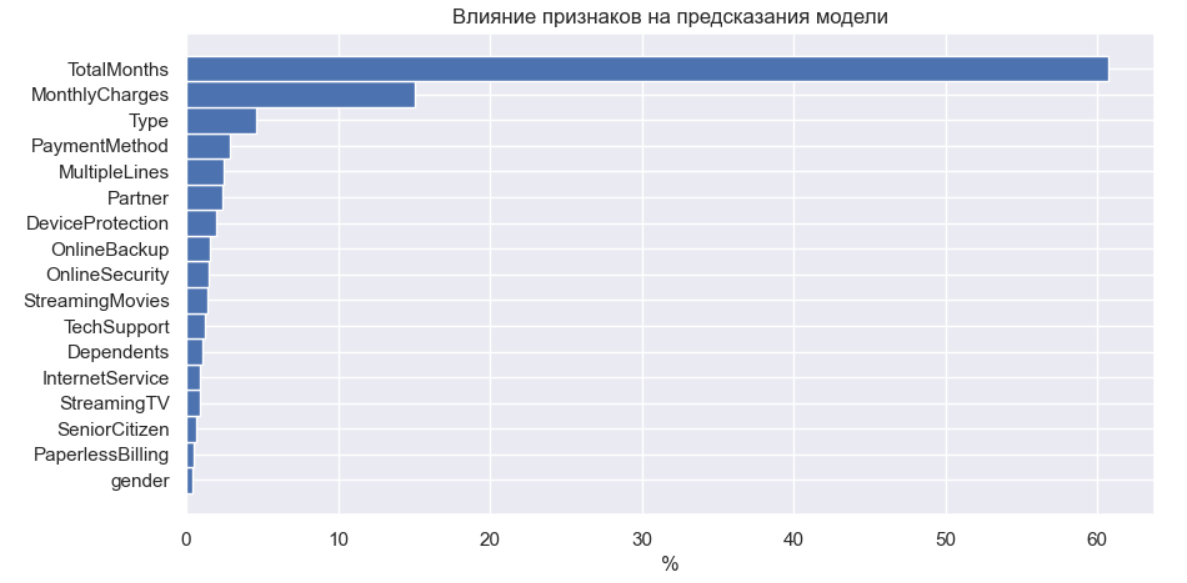

Анализ важности признаков показал, что наибольшую важность для предсказаний в модели CatBoost имеет признак **TotalMonth** - количество месяцев, через которое клиент ушел. Для оставшихся клиентов - это разница между сбором датасета и датой регистрации договора.

Следующие по значимости пять признаков: 
- MonthlyCharges – ежемесячные траты на услуги по договору;
- Type – тип оплаты: ежемесячный, годовой и тд;
- PaymentMethod – способ оплаты;
- MultipleLines – наличие возможности ведения параллельных линий во время звонка;
- Partner – наличие супруга(и).

Остальные признаки менее значимы для модели.


Итак, для удержания клиентов, или хотя бы уменьшения числа их оттоков, необходимо уделить внимание следующим клиентам:

- срок действующего договора которых от 15 до 45 месяцев;
- ежемесячные траты на услуги от 80 до 110 рублей;
- тип оплаты: месяц или два года;
- способ оплаты electronic check, bank transfer (automatic) или credit card (automatic) - скорее всего это клиенты не имеющие статуса пенсионеров;
- клиент состоит в браке и не имеет иждивенцев;
- имеется возможность ведения параллельных линий во время звонка.

При предложении дополнительных услуг особое внимание необходимо уделить на предложение таких как OnlineSecurity и TechSupport.

Для предсказания оттока клиентов в будущих периодах рекоментуется использовать созданную в данном проекте модель CatBoost.